In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

In [5]:
#loading data set from scikitlern
bc_data = load_breast_cancer()

In [6]:
#getting features from it
features = bc_data.data

In [7]:
#setting target for the data
target = bc_data.target

In [8]:
#spitting the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42)

In [9]:
# Standardize features
scaler_standard = StandardScaler()
features_train_scaled = scaler_standard.fit_transform(features_train)
features_test_scaled = scaler_standard.transform(features_test)

In [10]:
#biuling logesting regression model without penalty
from sklearn.linear_model import LogisticRegression

# Logistic regression without penalty
logistic_model_plain = LogisticRegression(max_iter=10000)
logistic_model_plain.fit(features_train_scaled, target_train)
predictions_logistic_plain = logistic_model_plain.predict(features_test_scaled)

In [11]:
#evaluating the model
print("Logistic Regression (No Penalty)")
print("Accuracy:", accuracy_score(target_test, predictions_logistic_plain))
print("Precision:", precision_score(target_test, predictions_logistic_plain))
print("Recall:", recall_score(target_test, predictions_logistic_plain))

Logistic Regression (No Penalty)
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465


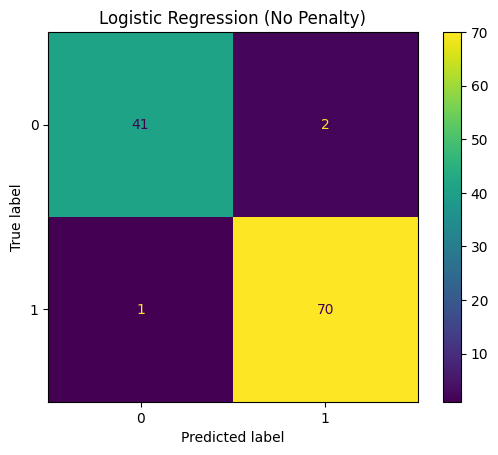

In [12]:
#building confusion matrix for it
ConfusionMatrixDisplay.from_estimator(logistic_model_plain, features_test_scaled, target_test)
plt.title("Logistic Regression (No Penalty)")
plt.show()

In [17]:
#adding L2 regularization
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

# lsting of C values to test
C_values = [100, 10, 1]

Logistic Regression with L2 Regularization

--- C = 100 ---
Accuracy : 0.9386
Precision: 0.9848
Recall   : 0.9155



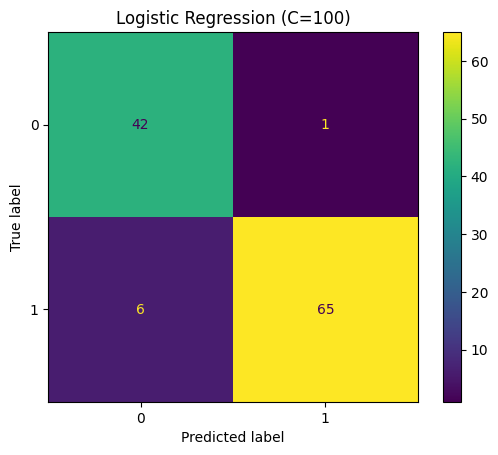

--- C = 10 ---
Accuracy : 0.9737
Precision: 0.9857
Recall   : 0.9718



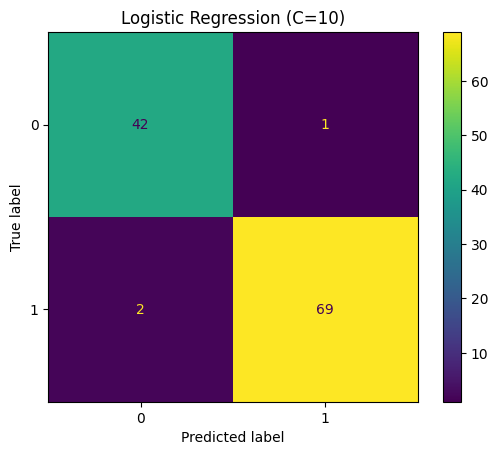

--- C = 1 ---
Accuracy : 0.9737
Precision: 0.9722
Recall   : 0.9859



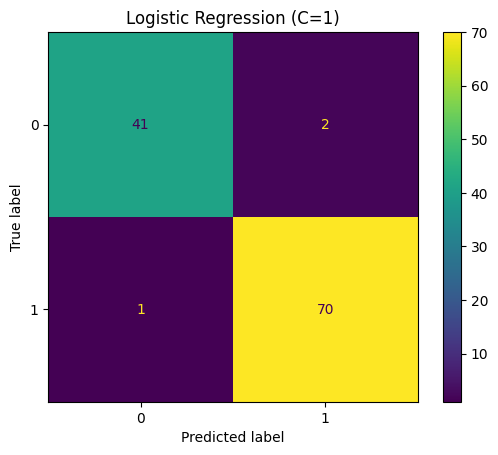

In [18]:
# Looping through different C values
print("Logistic Regression with L2 Regularization\n")

for C in C_values:
    # crating logistic regression model with L2 penalty
    model = LogisticRegression(penalty='l2', C=C, max_iter=10000)
    model.fit(features_train_scaled, target_train)

    # predicting the target values for the test set
    predictions = model.predict(features_test_scaled)

    # calculating accuracy, precision, and recall
    accuracy = accuracy_score(target_test, predictions)
    precision = precision_score(target_test, predictions)
    recall = recall_score(target_test, predictions)

    # demonstrating the results
    print(f"--- C = {C} ---")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}\n")

    # Plotting confusion matrix
    ConfusionMatrixDisplay.from_estimator(model, features_test_scaled, target_test)
    plt.title(f"Logistic Regression (C={C})")
    plt.show()


In [ ]:
#2.1 Train Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Create and train the model
nb_simple = GaussianNB()
nb_simple.fit(features_train_scaled, target_train)

# Predict on test data
nb_output = nb_simple.predict(features_test_scaled)


In [ ]:
# 2.2 Print Metrics and Plot Confusion Matrix
# Calculate evaluation metrics
nb_acc = accuracy_score(target_test, nb_output)
nb_prec = precision_score(target_test, nb_output)
nb_recall = recall_score(target_test, nb_output)
nb_f1 = f1_score(target_test, nb_output)

# Print results
print("Naive Bayes Classifier Results:")
print(f"Accuracy : {nb_acc:.4f}")
print(f"Precision: {nb_prec:.4f}")
print(f"Recall   : {nb_recall:.4f}")
print(f"F1 Score : {nb_f1:.4f}")


Naive Bayes Classifier Results:
Accuracy : 0.9649
Precision: 0.9589
Recall   : 0.9859
F1 Score : 0.9722


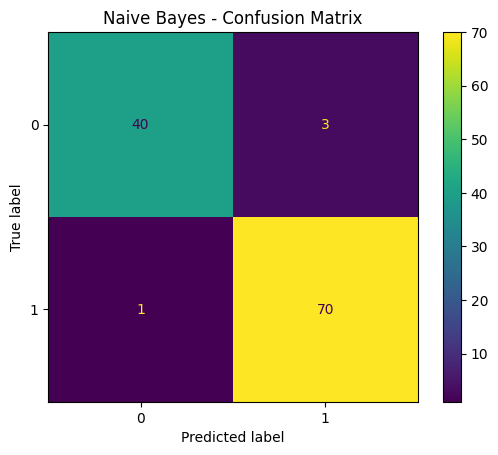

In [22]:
# Show confusion matrix
ConfusionMatrixDisplay.from_estimator(nb_simple, features_test_scaled, target_test)
plt.title("Naive Bayes - Confusion Matrix")
plt.show()


In [24]:
#3.1
#train smv classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Create and train the SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(features_train_scaled, target_train)

# Predict on test data
svm_output = svm_model.predict(features_test_scaled)


In [25]:
#printing metix and confision matrix
# Calculate evaluation metrics
svm_acc = accuracy_score(target_test, svm_output)
svm_prec = precision_score(target_test, svm_output)
svm_recall = recall_score(target_test, svm_output)
svm_f1 = f1_score(target_test, svm_output)

# printing results sets
print("SVM Classifier Results:")
print(f"Accuracy : {svm_acc:.4f}")
print(f"Precision: {svm_prec:.4f}")
print(f"Recall   : {svm_recall:.4f}")
print(f"F1 Score : {svm_f1:.4f}")

SVM Classifier Results:
Accuracy : 0.9561
Precision: 0.9714
Recall   : 0.9577
F1 Score : 0.9645


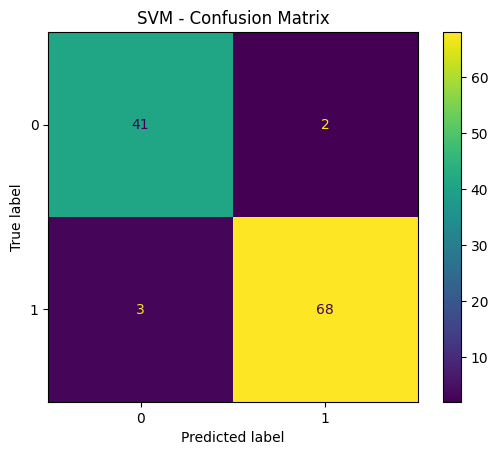

In [26]:
#displaying confusion matrix
ConfusionMatrixDisplay.from_estimator(svm_model, features_test_scaled, target_test)
plt.title("SVM - Confusion Matrix")
plt.show()

In [28]:
#4
#Train Logistic Regression Using PCA 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Range of PCA components to test (1 to total features)
k_values = range(1, features.shape[1] + 1)

# Lists to store metric results
pca_accuracies = []
pca_precisions = []
pca_recalls = []
pca_f1_scores = []

# Try each K
for k in k_values:
    # Apply PCA
    pca = PCA(n_components=k)
    train_pca = pca.fit_transform(features_train_scaled)
    test_pca = pca.transform(features_test_scaled)

    # Train logistic regression on PCA-reduced data
    pca_logreg = LogisticRegression(max_iter=10000)
    pca_logreg.fit(train_pca, target_train)
    preds_pca = pca_logreg.predict(test_pca)

    # Store metrics
    pca_accuracies.append(accuracy_score(target_test, preds_pca))
    pca_precisions.append(precision_score(target_test, preds_pca))
    pca_recalls.append(recall_score(target_test, preds_pca))
    pca_f1_scores.append(f1_score(target_test, preds_pca))


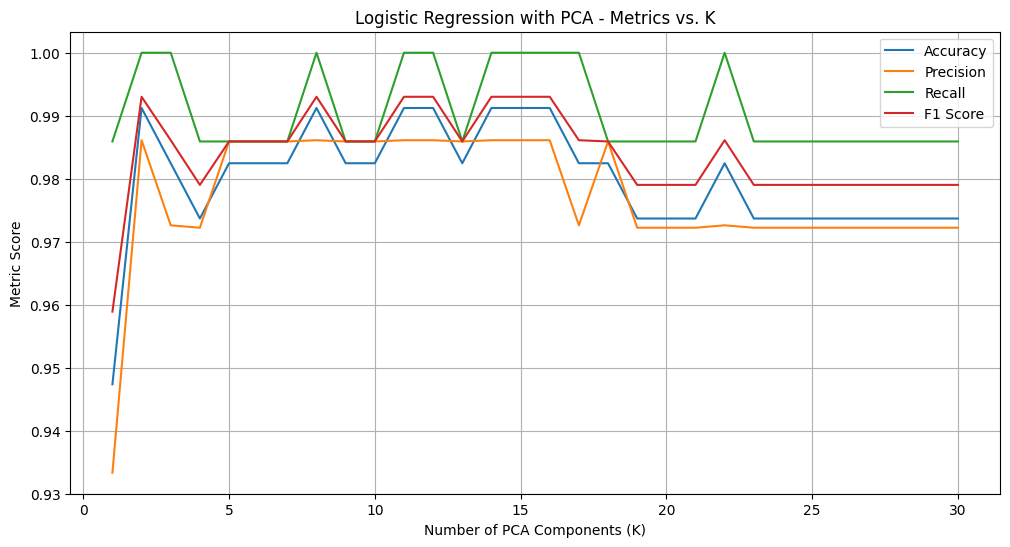


Best Accuracy: 0.9912 achieved with K = 2


In [30]:
#Plot All Metrics vs Number of PCA Components
# Plot metrics
plt.figure(figsize=(12, 6))
plt.plot(k_values, pca_accuracies, label='Accuracy')
plt.plot(k_values, pca_precisions, label='Precision')
plt.plot(k_values, pca_recalls, label='Recall')
plt.plot(k_values, pca_f1_scores, label='F1 Score')

plt.xlabel('Number of PCA Components (K)')
plt.ylabel('Metric Score')
plt.title('Logistic Regression with PCA - Metrics vs. K')
plt.legend()
plt.grid(True)
plt.show()

# Best K
best_k_index = pca_accuracies.index(max(pca_accuracies))
best_k = best_k_index + 1
best_accuracy = pca_accuracies[best_k_index]
print(f"\nBest Accuracy: {best_accuracy:.4f} achieved with K = {best_k}")
